In [53]:
from qiskit import Aer, execute, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np
from qiskit.visualization import plot_histogram

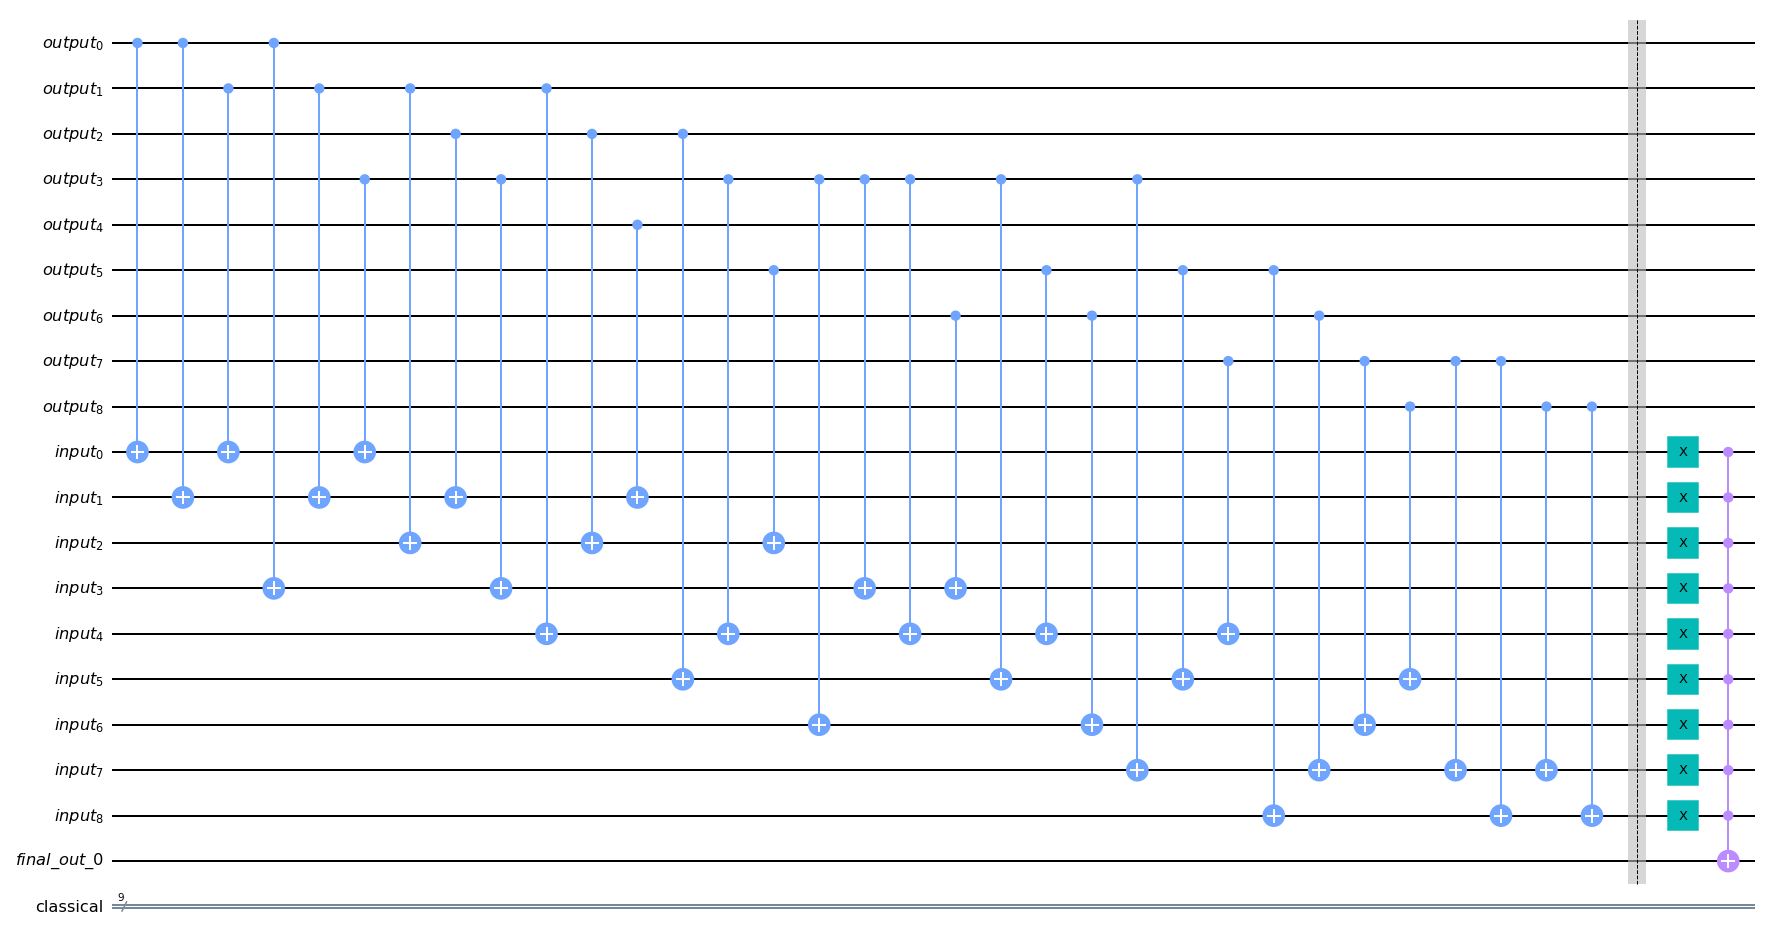

In [71]:
output_qubits = QuantumRegister(9, name = 'output')
input_qubits = QuantumRegister(9, name = 'input')
final_output_qubit = QuantumRegister(1, name = 'final_out')
cbits = ClassicalRegister(9, name = 'classical')

qc = QuantumCircuit(output_qubits, input_qubits, final_output_qubit, cbits) # 19 qubits + 9 classical bits

# Compute Lights Changes
# 0
qc.cx(output_qubits[0], input_qubits[0])
qc.cx(output_qubits[0], input_qubits[1])
qc.cx(output_qubits[0], input_qubits[3])
# 1
qc.cx(output_qubits[1], input_qubits[0])
qc.cx(output_qubits[1], input_qubits[1])
qc.cx(output_qubits[1], input_qubits[2])
qc.cx(output_qubits[1], input_qubits[4])
# 2
qc.cx(output_qubits[2], input_qubits[1])
qc.cx(output_qubits[2], input_qubits[2])
qc.cx(output_qubits[2], input_qubits[5])
# 3
qc.cx(output_qubits[3], input_qubits[0])
qc.cx(output_qubits[3], input_qubits[3])
qc.cx(output_qubits[3], input_qubits[4])
qc.cx(output_qubits[3], input_qubits[6])
# 4
qc.cx(output_qubits[4], input_qubits[1])
qc.cx(output_qubits[3], input_qubits[3])
qc.cx(output_qubits[3], input_qubits[4])
qc.cx(output_qubits[3], input_qubits[5])
qc.cx(output_qubits[3], input_qubits[7])
# 5
qc.cx(output_qubits[5], input_qubits[2])
qc.cx(output_qubits[5], input_qubits[4])
qc.cx(output_qubits[5], input_qubits[5])
qc.cx(output_qubits[5], input_qubits[8])
# 6
qc.cx(output_qubits[6], input_qubits[3])
qc.cx(output_qubits[6], input_qubits[6])
qc.cx(output_qubits[6], input_qubits[7])
# 7
qc.cx(output_qubits[7], input_qubits[4])
qc.cx(output_qubits[7], input_qubits[6])
qc.cx(output_qubits[7], input_qubits[7])
qc.cx(output_qubits[7], input_qubits[8])
# 8
qc.cx(output_qubits[8], input_qubits[5])
qc.cx(output_qubits[8], input_qubits[7])
qc.cx(output_qubits[8], input_qubits[8])

qc.barrier()

# Lights * OFF *
for qubit in input_qubits:
    qc.x(qubit)

# Final Result
qc.mct(input_qubits, final_output_qubit)

# Draw Circuit
qc.draw('mpl', fold=-1)

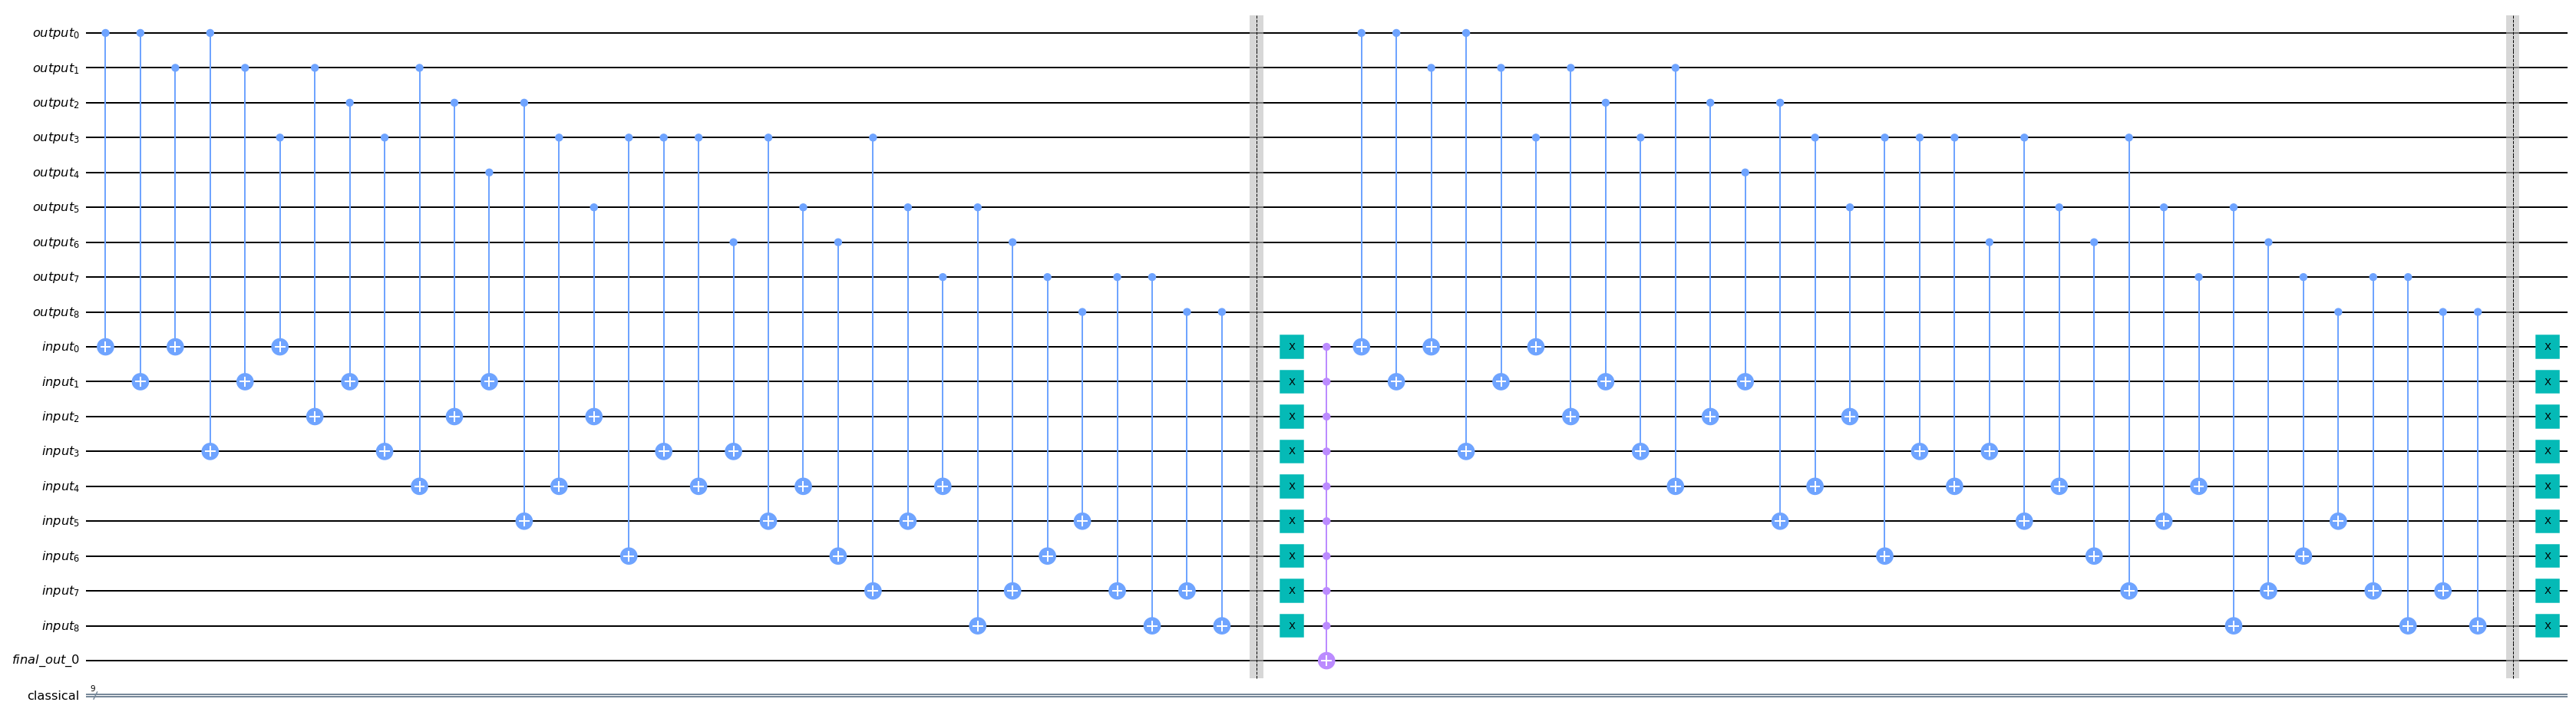

In [72]:
# Uncompute Lights Changes (Reset Input Qubits)
# 0
qc.cx(output_qubits[0], input_qubits[0])
qc.cx(output_qubits[0], input_qubits[1])
qc.cx(output_qubits[0], input_qubits[3])
# 1
qc.cx(output_qubits[1], input_qubits[0])
qc.cx(output_qubits[1], input_qubits[1])
qc.cx(output_qubits[1], input_qubits[2])
qc.cx(output_qubits[1], input_qubits[4])
# 2
qc.cx(output_qubits[2], input_qubits[1])
qc.cx(output_qubits[2], input_qubits[2])
qc.cx(output_qubits[2], input_qubits[5])
# 3
qc.cx(output_qubits[3], input_qubits[0])
qc.cx(output_qubits[3], input_qubits[3])
qc.cx(output_qubits[3], input_qubits[4])
qc.cx(output_qubits[3], input_qubits[6])
# 4
qc.cx(output_qubits[4], input_qubits[1])
qc.cx(output_qubits[3], input_qubits[3])
qc.cx(output_qubits[3], input_qubits[4])
qc.cx(output_qubits[3], input_qubits[5])
qc.cx(output_qubits[3], input_qubits[7])
# 5
qc.cx(output_qubits[5], input_qubits[2])
qc.cx(output_qubits[5], input_qubits[4])
qc.cx(output_qubits[5], input_qubits[5])
qc.cx(output_qubits[5], input_qubits[8])
# 6
qc.cx(output_qubits[6], input_qubits[3])
qc.cx(output_qubits[6], input_qubits[6])
qc.cx(output_qubits[6], input_qubits[7])
# 7
qc.cx(output_qubits[7], input_qubits[4])
qc.cx(output_qubits[7], input_qubits[6])
qc.cx(output_qubits[7], input_qubits[7])
qc.cx(output_qubits[7], input_qubits[8])
# 8
qc.cx(output_qubits[8], input_qubits[5])
qc.cx(output_qubits[8], input_qubits[7])
qc.cx(output_qubits[8], input_qubits[8])

qc.barrier()

# Lights * OFF *
for qubit in input_qubits:
    qc.x(qubit)

oracle = qc
# Draw Circuit
oracle.draw('mpl', fold=-1)

In [73]:
def diffuser(nqubits):
    qc1 = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc1.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc1.x(qubit)
    # Do multi-controlled-Z gate
    qc1.h(nqubits-1)
    qc1.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc1.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc1.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc1.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc1.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [96]:
final_qc = QuantumCircuit(output_qubits, input_qubits, final_output_qubit, cbits)

# Initialise 'final_output' in state |->
final_qc.initialize([1, -1]/np.sqrt(2), final_output_qubit)

# Initialise qubits in state |s>
final_qc.h(output_qubits)

# Set input
final_qc.x(input_qubits[3])
final_qc.x(input_qubits[5])
final_qc.x(input_qubits[6])
final_qc.x(input_qubits[7])
final_qc.barrier()

# sqrt(N) = sqrt(2^9) = 22,63
## Iterations
for i in range(0, 22):
    # Apply our oracle
    final_qc += oracle
    final_qc.barrier()
    # Apply our diffuser
    final_qc.append(diffuser(9), [0,1,2,3,4,5,6,7,8])

# Measure the variable qubits
final_qc.measure(output_qubits, cbits)

print('Finished!')
# Draw Final Circuit
# final_qc.draw('mpl', fold=-1)

Finished!


In [97]:
# Simulate and plot results
simulator = Aer.get_backend('qasm_simulator')
transpiled_final_qc = transpile(final_qc, simulator)
qobj = assemble(transpiled_final_qc)
result = simulator.run(qobj, shots = 2000).result().get_counts()
# plot_histogram(result)
print('Finished!')

Finished!


In [98]:
final = result
import operator
k = max(final.keys(), key=(lambda key: final[key]))
print(k, final[k])

000011001 1647


In [ ]:
# Interpreting the Result
'''
100*1647/2000 = 82,35%
82,35% chance of push the lights: 0, 3 and 4.
'''
# This result is the initially expected for initial input seted

In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.5',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.23.6'}